### Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import *
import matplotlib.colors as mcolors
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from matplotlib import ticker
import warnings

### Load data from the csv files into a DataFrames

In [2]:
# For the summary statistics only data collected after compression corrections were used.

CB_den1_bouton = pd.read_csv('CB_den1_after_shrink_bouton.csv')
CB_den1_synapse = pd.read_csv('CB_den1_after_shrink_synapse.csv')
CB_den2_bouton = pd.read_csv('CB_den2_after_shrink_bouton.csv')
CB_den2_synapse = pd.read_csv('CB_den2_after_shrink_synapse.csv')
CB_den3_bouton = pd.read_csv('CB_den3_after_shrink_bouton.csv')
CB_den3_synapse = pd.read_csv('CB_den3_after_shrink_synapse.csv')

CR_den1_bouton = pd.read_csv('CR_den1_after_shrink_bouton.csv')
CR_den1_synapse = pd.read_csv('CR_den1_after_shrink_synapse.csv')
CR_den2_bouton = pd.read_csv('CR_den2_after_shrink_bouton.csv')
CR_den2_synapse = pd.read_csv('CR_den2_after_shrink_synapse.csv')
CR_den3_bouton = pd.read_csv('CR_den3_after_shrink_bouton.csv')
CR_den3_synapse = pd.read_csv('CR_den3_after_shrink_synapse.csv')

PV_den1_bouton = pd.read_csv('PV_den1_after_shrink_bouton.csv')
PV_den1_synapse = pd.read_csv('PV_den1_after_shrink_synapse.csv')
PV_den2_bouton = pd.read_csv('PV_den2_after_shrink_bouton.csv')
PV_den2_synapse = pd.read_csv('PV_den2_after_shrink_synapse.csv')
PV_den3_bouton = pd.read_csv('PV_den3_after_shrink_bouton.csv')
PV_den3_synapse = pd.read_csv('PV_den3_after_shrink_synapse.csv')

In [3]:
CB_den1_bouton.head()

,bouton_number,location,comment,surface_area_micron^2,volume_micron^3
0,b1,shaft,NaN,2.420002,0.286752
1,b2,shaft,NaN,1.510073,0.120455
2,b3,shaft,NaN,1.827364,0.257001
3,b4,branch1,*partial,NaN,NaN
4,b5,shaft,NaN,2.487303,0.203978


In [4]:
CB_den1_synapse.head()

,bouton_number,synapse_number,surface_area_micron^2,distance_from_soma_micron
0,b1,as1,0.049045,5.050980
1,b2,as2,0.101529,5.503922
2,b3,as3,0.045333,7.127451
3,b4,ss1,NaN,NaN
4,b5,as4,0.199113,10.153922


### Reorganizing dataframes to prepare for statistical analysis

In [5]:
# Add a new column 'marker' for identification

CB_den1_bouton['marker'] = 'calbindin'
CB_den1_synapse['marker'] = 'calbindin'
CB_den2_bouton['marker'] = 'calbindin'
CB_den2_synapse['marker'] = 'calbindin'
CB_den3_bouton['marker'] = 'calbindin'
CB_den3_synapse['marker'] = 'calbindin'

CR_den1_bouton['marker'] = 'calretinin'
CR_den1_synapse['marker'] = 'calretinin'
CR_den2_bouton['marker'] = 'calretinin'
CR_den2_synapse['marker'] = 'calretinin'
CR_den3_bouton['marker'] = 'calretinin'
CR_den3_synapse['marker'] = 'calretinin'

PV_den1_bouton['marker'] = 'parvalbumin'
PV_den1_synapse['marker'] = 'parvalbumin'
PV_den2_bouton['marker'] = 'parvalbumin'
PV_den2_synapse['marker'] = 'parvalbumin'
PV_den3_bouton['marker'] = 'parvalbumin'
PV_den3_synapse['marker'] = 'parvalbumin'

In [6]:
CB_den1_bouton.head()

,bouton_number,location,comment,surface_area_micron^2,volume_micron^3,marker
0,b1,shaft,NaN,2.420002,0.286752,calbindin
1,b2,shaft,NaN,1.510073,0.120455,calbindin
2,b3,shaft,NaN,1.827364,0.257001,calbindin
3,b4,branch1,*partial,NaN,NaN,calbindin
4,b5,shaft,NaN,2.487303,0.203978,calbindin


In [7]:
CR_den1_bouton.head()

,bouton_number,location,comment,surface_area_micron^2,volume_micron^3,marker
0,b1,NaN,NaN,1.792631,0.156600,calretinin
1,b2,NaN,NaN,3.131823,0.346040,calretinin
2,b3,NaN,NaN,0.609929,0.036171,calretinin
3,b4,NaN,NaN,1.244231,0.126382,calretinin
4,b5,NaN,NaN,0.756150,0.063169,calretinin


In [8]:
PV_den1_bouton.head()

,bouton_number,location,comment,surface_area_micron^2,volume_micron^3,marker
0,b1,shaft,*partial,NaN,NaN,parvalbumin
1,b2,shaft,NaN,0.806441,0.038515,parvalbumin
2,b3,shaft,NaN,3.650360,0.260579,parvalbumin
3,b4,shaft,NaN,1.158350,0.074952,parvalbumin
4,b5,shaft,partial,NaN,NaN,parvalbumin


In [9]:
# Merge the dataframes for each type

def merge_bouton_synapse(bouton_df, synapse_df):
    # Merge the bouton dataframe with its corresponding synapse dataframe on 'bouton_number'
    merged_df = pd.merge(bouton_df, synapse_df, on='bouton_number', how='inner')
    return merged_df

CB_den1_merged = merge_bouton_synapse(CB_den1_bouton, CB_den1_synapse)
CB_den2_merged = merge_bouton_synapse(CB_den2_bouton, CB_den2_synapse)
CB_den3_merged = merge_bouton_synapse(CB_den3_bouton, CB_den3_synapse)

CR_den1_merged = merge_bouton_synapse(CR_den1_bouton, CR_den1_synapse)
CR_den2_merged = merge_bouton_synapse(CR_den2_bouton, CR_den2_synapse)
CR_den3_merged = merge_bouton_synapse(CR_den3_bouton, CR_den3_synapse)

PV_den1_merged = merge_bouton_synapse(PV_den1_bouton, PV_den1_synapse)
PV_den2_merged = merge_bouton_synapse(PV_den2_bouton, PV_den2_synapse)
PV_den3_merged = merge_bouton_synapse(PV_den3_bouton, PV_den3_synapse)

# Combine all merged dataframes for each type (CB, CR, PV)

CB_combined = pd.concat([CB_den1_merged, CB_den2_merged, CB_den3_merged], ignore_index=True)
CR_combined = pd.concat([CR_den1_merged, CR_den2_merged, CR_den3_merged], ignore_index=True)
PV_combined = pd.concat([PV_den1_merged, PV_den2_merged, PV_den3_merged], ignore_index=True)

In [10]:
CB_den1_bouton.shape

(110, 6)

In [11]:
CB_den1_synapse.shape

(110, 5)

In [12]:
CB_den1_merged.shape

(112, 10)

In [14]:
CB_den1_merged.duplicated().sum()
# CB_den1 b21 has two synapses, therefore bouton data represented as duplicates.

np.int64(2)

In [15]:
CB_den2_bouton.shape

(41, 6)

In [16]:
CB_den2_synapse.shape

(41, 5)

In [17]:
CB_den2_merged.shape

(41, 10)

In [18]:
CB_den2_merged.duplicated().sum()

np.int64(0)

In [19]:
CB_den3_bouton.shape

(6, 6)

In [20]:
CB_den3_synapse.shape

(6, 5)

In [21]:
CB_den3_merged.shape

(6, 10)

In [22]:
CB_den3_merged.duplicated().sum()

np.int64(0)

In [23]:
CB_combined.shape

(159, 10)

In [24]:
CR_den1_bouton.shape

(43, 6)

In [25]:
CR_den1_synapse.shape

(43, 5)

In [26]:
CR_den1_merged.shape

(43, 10)

In [27]:
CR_den1_merged.duplicated().sum()

np.int64(0)

In [28]:
CR_den2_bouton.shape

(50, 6)

In [29]:
CR_den2_synapse.shape

(50, 5)

In [30]:
CR_den2_merged.shape

(50, 10)

In [31]:
CR_den2_merged.duplicated().sum()

np.int64(0)

In [32]:
CR_den3_bouton.shape

(28, 6)

In [33]:
CR_den3_synapse.shape

(28, 5)

In [34]:
CR_den3_merged.shape

(28, 10)

In [35]:
CR_den3_merged.duplicated().sum()

np.int64(0)

In [36]:
CR_combined.shape

(121, 10)

In [37]:
PV_den1_bouton.shape

(72, 6)

In [38]:
PV_den1_synapse.shape

(72, 5)

In [39]:
PV_den1_merged.shape

(72, 10)

In [40]:
PV_den1_merged.duplicated().sum()

np.int64(0)

In [41]:
PV_den2_bouton.shape

(178, 6)

In [42]:
PV_den2_synapse.shape

(178, 5)

In [43]:
PV_den2_merged.shape

(178, 10)

In [44]:
PV_den2_merged.duplicated().sum()

np.int64(0)

In [45]:
PV_den3_bouton.shape

(251, 6)

In [46]:
PV_den3_synapse.shape

(251, 5)

In [47]:
PV_den3_merged.shape

(251, 10)

In [48]:
PV_den3_merged.duplicated().sum()

np.int64(0)

In [49]:
PV_combined.shape

(501, 10)

In [50]:
# List of columns needed for statistical analysis
stat_columns = ['marker_x', 'bouton_number', 'synapse_number', 
                   'surface_area_micron^2_x', 'volume_micron^3', 
                   'surface_area_micron^2_y', 'distance_from_soma_micron']

# Concatenate all combined DataFrames
full_dataframe = pd.concat([CB_combined, CR_combined, PV_combined], ignore_index=True)

# Select only the stat_columns
full_dataframe = full_dataframe[stat_columns]

# Display the full dataframe information
full_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marker_x                   781 non-null    object 
 1   bouton_number              781 non-null    object 
 2   synapse_number             779 non-null    object 
 3   surface_area_micron^2_x    767 non-null    float64
 4   volume_micron^3            767 non-null    float64
 5   surface_area_micron^2_y    767 non-null    float64
 6   distance_from_soma_micron  767 non-null    float64
dtypes: float64(4), object(3)
memory usage: 42.8+ KB


In [51]:
# Rename the columns in the DataFrame
full_dataframe.rename(columns={
    'marker_x': 'marker',
    'surface_area_micron^2_x': 'bouton_surface_area',
    'volume_micron^3': 'bouton_volume',
    'surface_area_micron^2_y': 'synapse_surface_area',
    'distance_from_soma_micron': 'synapse_distance_from_soma'
}, inplace=True)

# Display the updated DataFrame info
full_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      781 non-null    object 
 1   bouton_number               781 non-null    object 
 2   synapse_number              779 non-null    object 
 3   bouton_surface_area         767 non-null    float64
 4   bouton_volume               767 non-null    float64
 5   synapse_surface_area        767 non-null    float64
 6   synapse_distance_from_soma  767 non-null    float64
dtypes: float64(4), object(3)
memory usage: 42.8+ KB


In [52]:
full_dataframe.duplicated().sum()

np.int64(2)

In [53]:
# Remove duplicated values
full_dataframe.drop_duplicates()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma
0,calbindin,b1,as1,2.420002,0.286752,0.049045,5.050980
1,calbindin,b2,as2,1.510073,0.120455,0.101529,5.503922
2,calbindin,b3,as3,1.827364,0.257001,0.045333,7.127451
3,calbindin,b4,ss1,NaN,NaN,NaN,NaN
4,calbindin,b5,as4,2.487303,0.203978,0.199113,10.153922
...,...,...,...,...,...,...,...
776,parvalbumin,b247,as221,2.008980,0.097113,0.027914,151.907000
777,parvalbumin,b248,as222,0.949342,0.053970,0.025779,152.336000
778,parvalbumin,b249,as223,1.118090,0.102173,0.013867,153.413000
779,parvalbumin,b250,as224,NaN,NaN,NaN,NaN


In [54]:
# Remove NaN values
full_dataframe_cleaned = full_dataframe.dropna(axis=0)

In [55]:
full_dataframe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 780
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      767 non-null    object 
 1   bouton_number               767 non-null    object 
 2   synapse_number              767 non-null    object 
 3   bouton_surface_area         767 non-null    float64
 4   bouton_volume               767 non-null    float64
 5   synapse_surface_area        767 non-null    float64
 6   synapse_distance_from_soma  767 non-null    float64
dtypes: float64(4), object(3)
memory usage: 47.9+ KB


In [56]:
# Filter full_dataframe_cleaned for synapse numbers starting with 'ss'
full_dataframe_cleaned_ss = full_dataframe_cleaned[full_dataframe_cleaned['synapse_number'].str.startswith('ss')]

# Filter full_dataframe_cleaned for synapse numbers starting with 'as'
full_dataframe_cleaned_as = full_dataframe_cleaned[full_dataframe_cleaned['synapse_number'].str.startswith('as')]

In [57]:
full_dataframe_cleaned_ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 9 to 761
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      124 non-null    object 
 1   bouton_number               124 non-null    object 
 2   synapse_number              124 non-null    object 
 3   bouton_surface_area         124 non-null    float64
 4   bouton_volume               124 non-null    float64
 5   synapse_surface_area        124 non-null    float64
 6   synapse_distance_from_soma  124 non-null    float64
dtypes: float64(4), object(3)
memory usage: 7.8+ KB


In [59]:
full_dataframe_cleaned_as.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 0 to 780
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      643 non-null    object 
 1   bouton_number               643 non-null    object 
 2   synapse_number              643 non-null    object 
 3   bouton_surface_area         643 non-null    float64
 4   bouton_volume               643 non-null    float64
 5   synapse_surface_area        643 non-null    float64
 6   synapse_distance_from_soma  643 non-null    float64
dtypes: float64(4), object(3)
memory usage: 40.2+ KB


### Exploratory Data Analysis

In [119]:
full_dataframe_cleaned_descriptive_stats = full_dataframe_cleaned.describe().T
full_dataframe_cleaned_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
bouton_surface_area,767.0,1.582330,1.009500,0.186348,0.915207,1.304140,1.968175,7.943580
bouton_volume,767.0,0.123905,0.109488,0.004683,0.050380,0.088240,0.159653,0.846982
synapse_surface_area,767.0,0.054067,0.034159,0.004907,0.030573,0.045542,0.066645,0.247606
synapse_distance_from_soma,767.0,71.270015,52.905964,1.506900,29.637950,53.750000,105.121127,220.618000


In [61]:
full_dataframe_cleaned_ss_descriptive_stats = full_dataframe_cleaned_ss.describe().T
full_dataframe_cleaned_ss_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
bouton_surface_area,124.0,2.207696,1.378398,0.329797,1.204468,1.823577,2.966438,7.943580
bouton_volume,124.0,0.198474,0.150402,0.022580,0.082147,0.162694,0.246997,0.727523
synapse_surface_area,124.0,0.045640,0.028350,0.005688,0.023903,0.038363,0.056827,0.144233
synapse_distance_from_soma,124.0,59.592867,51.069761,4.027200,23.222750,41.065750,84.222775,220.618000


In [62]:
full_dataframe_cleaned_as_descriptive_stats = full_dataframe_cleaned_as.describe().T
full_dataframe_cleaned_as_descriptive_stats

,count,mean,std,min,25%,50%,75%,max
bouton_surface_area,643.0,1.461730,0.872814,0.186348,0.879222,1.249700,1.823647,7.093180
bouton_volume,643.0,0.109525,0.093209,0.004683,0.048154,0.083691,0.139148,0.846982
synapse_surface_area,643.0,0.055692,0.034956,0.004907,0.032073,0.046968,0.067891,0.247606
synapse_distance_from_soma,643.0,73.521907,52.995883,1.506900,31.112538,58.242600,108.649696,218.995000


In [63]:
full_dataframe_cleaned_descriptive_stats.to_excel('full_dataframe_cleaned_descriptive_stats.xlsx')
full_dataframe_cleaned_ss_descriptive_stats.to_excel('full_dataframe_cleaned_ss_descriptive_stats.xlsx')
full_dataframe_cleaned_as_descriptive_stats.to_excel('full_dataframe_cleaned_as_descriptive_stats.xlsx')

In [64]:
# Perform the Shapiro-Wilk test for normality: full_dataframe_cleaned

shapiro_columns = full_dataframe_cleaned[['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']]

stat_analysis = {}
for column in shapiro_columns.columns:
    stat_analysis[column] = {
        'Shapiro': stats.shapiro(shapiro_columns[column]),
        'Kurtosis': stats.kurtosis(shapiro_columns[column]),
        'Skewness': stats.skew(shapiro_columns[column])
    }

full_dataframe_cleaned_normality_test = pd.DataFrame(stat_analysis).T

full_dataframe_cleaned_normality_test
# Shapiro: 1. value: t-stat of the test, 2. value: p-value

,Shapiro,Kurtosis,Skewness
bouton_surface_area,"(0.8412178649664239, 5.573951629516159e-27)",6.250576,1.995104
bouton_volume,"(0.7739002311760642, 3.3933383513553265e-31)",7.995199,2.379366
synapse_surface_area,"(0.8620353525437074, 2.150995327466119e-25)",4.120496,1.727989
synapse_distance_from_soma,"(0.9133310013724768, 1.6503912813895438e-20)",-0.059951,0.865587


In [65]:
# Another method for listing columns distributed non_normally: full_dataframe_cleaned
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']


In [66]:
# Perform the Shapiro-Wilk test for normality: full_dataframe_cleaned_ss

shapiro_columns = full_dataframe_cleaned_ss[['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']]

stat_analysis = {}
for column in shapiro_columns.columns:
    stat_analysis[column] = {
        'Shapiro': stats.shapiro(shapiro_columns[column]),
        'Kurtosis': stats.kurtosis(shapiro_columns[column]),
        'Skewness': stats.skew(shapiro_columns[column])
    }

full_dataframe_cleaned_ss_normality_test = pd.DataFrame(stat_analysis).T

full_dataframe_cleaned_ss_normality_test
# Shapiro: 1. value: t-stat of the test, 2. value: p-value

,Shapiro,Kurtosis,Skewness
bouton_surface_area,"(0.8990066288984657, 1.1961692139769447e-07)",2.476411,1.337898
bouton_volume,"(0.8775218460183377, 1.0790510537134983e-08)",1.037071,1.239084
synapse_surface_area,"(0.9010949879838015, 1.5354399398145304e-07)",1.608957,1.255547
synapse_distance_from_soma,"(0.8532651629353607, 9.604080561354232e-10)",1.494203,1.382924


In [67]:
# Another method for listing columns distributed non_normally: full_dataframe_cleaned_ss
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']


In [68]:
# Perform the Shapiro-Wilk test for normality: full_dataframe_cleaned_as

shapiro_columns = full_dataframe_cleaned_as[['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']]

stat_analysis = {}
for column in shapiro_columns.columns:
    stat_analysis[column] = {
        'Shapiro': stats.shapiro(shapiro_columns[column]),
        'Kurtosis': stats.kurtosis(shapiro_columns[column]),
        'Skewness': stats.skew(shapiro_columns[column])
    }

full_dataframe_cleaned_as_normality_test = pd.DataFrame(stat_analysis).T

full_dataframe_cleaned_as_normality_test
# Shapiro: 1. value: t-stat of the test, 2. value: p-value

,Shapiro,Kurtosis,Skewness
bouton_surface_area,"(0.8523586694365699, 4.821669171785041e-24)",6.84996,1.99574
bouton_volume,"(0.7646199712961688, 2.5846824942817336e-29)",13.163385,2.777459
synapse_surface_area,"(0.856624519663127, 9.909143875966387e-24)",4.110117,1.750613
synapse_distance_from_soma,"(0.9213694010192873, 8.41718115290569e-18)",-0.240671,0.78344


In [69]:
# Another method for listing columns distributed non_normally: full_dataframe_cleaned_as
# p-value < 0.05 indicates non-normal distribution
non_normal_cols = []
for column in shapiro_columns.columns:
    stat, p = stats.shapiro(shapiro_columns[column])
    if p < 0.05:  
        non_normal_cols.append(column)

print("Non-normally distributed columns:", non_normal_cols)

Non-normally distributed columns: ['bouton_surface_area', 'bouton_volume', 'synapse_surface_area', 'synapse_distance_from_soma']


In [70]:
# 1. Filter the DataFrame for rows with markers
calbindin_df = full_dataframe_cleaned[full_dataframe_cleaned['marker'] == 'calbindin'].copy()
calretinin_df = full_dataframe_cleaned[full_dataframe_cleaned['marker'] == 'calretinin'].copy()
parvalbumin_df = full_dataframe_cleaned[full_dataframe_cleaned['marker'] == 'parvalbumin'].copy()

# 2. Clean the synapse_number column
calbindin_df['synapse_number'] = calbindin_df['synapse_number'].str.strip()
calretinin_df['synapse_number'] = calretinin_df['synapse_number'].str.strip()
parvalbumin_df['synapse_number'] = parvalbumin_df['synapse_number'].str.strip()

# 3. Create new columns: 'as' and 'ss'
calbindin_df['synapse_type'] = calbindin_df['synapse_number'].apply(lambda x: 'as' if x.startswith('as') else 'ss')
calretinin_df['synapse_type'] = calretinin_df['synapse_number'].apply(lambda x: 'as' if x.startswith('as') else 'ss')
parvalbumin_df['synapse_type'] = parvalbumin_df['synapse_number'].apply(lambda x: 'as' if x.startswith('as') else 'ss')

In [71]:
calbindin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type
0,calbindin,b1,as1,2.420002,0.286752,0.049045,5.050980,as
1,calbindin,b2,as2,1.510073,0.120455,0.101529,5.503922,as
2,calbindin,b3,as3,1.827364,0.257001,0.045333,7.127451,as
4,calbindin,b5,as4,2.487303,0.203978,0.199113,10.153922,as
6,calbindin,b7,as6,2.522674,0.152951,0.140426,14.685294,as


In [72]:
calretinin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type
159,calretinin,b1,ss1,1.792631,0.156600,0.034853,19.996154,ss
160,calretinin,b2,ss2,3.131823,0.346040,0.056729,20.849038,ss
161,calretinin,b3,as1,0.609929,0.036171,0.010335,23.882692,as
162,calretinin,b4,ss3,1.244231,0.126382,0.029389,25.094231,ss
163,calretinin,b5,as2,0.756150,0.063169,0.033509,25.705769,as


In [73]:
parvalbumin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type
281,parvalbumin,b2,as2,0.806441,0.038515,0.059982,3.3493,as
282,parvalbumin,b3,as3,3.650360,0.260579,0.166120,4.0323,as
283,parvalbumin,b4,ss1,1.158350,0.074952,0.055239,4.7494,ss
285,parvalbumin,b6,ss3,2.633370,0.171998,0.068455,6.6741,ss
286,parvalbumin,b7,as4,1.042910,0.045959,0.021003,7.1191,as


In [74]:
calbindin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 158
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      152 non-null    object 
 1   bouton_number               152 non-null    object 
 2   synapse_number              152 non-null    object 
 3   bouton_surface_area         152 non-null    float64
 4   bouton_volume               152 non-null    float64
 5   synapse_surface_area        152 non-null    float64
 6   synapse_distance_from_soma  152 non-null    float64
 7   synapse_type                152 non-null    object 
dtypes: float64(4), object(4)
memory usage: 10.7+ KB


In [75]:
calretinin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 159 to 279
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      119 non-null    object 
 1   bouton_number               119 non-null    object 
 2   synapse_number              119 non-null    object 
 3   bouton_surface_area         119 non-null    float64
 4   bouton_volume               119 non-null    float64
 5   synapse_surface_area        119 non-null    float64
 6   synapse_distance_from_soma  119 non-null    float64
 7   synapse_type                119 non-null    object 
dtypes: float64(4), object(4)
memory usage: 8.4+ KB


In [76]:
parvalbumin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 281 to 780
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   marker                      496 non-null    object 
 1   bouton_number               496 non-null    object 
 2   synapse_number              496 non-null    object 
 3   bouton_surface_area         496 non-null    float64
 4   bouton_volume               496 non-null    float64
 5   synapse_surface_area        496 non-null    float64
 6   synapse_distance_from_soma  496 non-null    float64
 7   synapse_type                496 non-null    object 
dtypes: float64(4), object(4)
memory usage: 34.9+ KB


C:\Users\PC\AppData\Local\Temp\ipykernel_1248\3952824888.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\3952824888.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['exc', 'inh'], font='Cambria', fontsize=18, fontweight='bold')
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\3952824888.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\3952824888.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.se

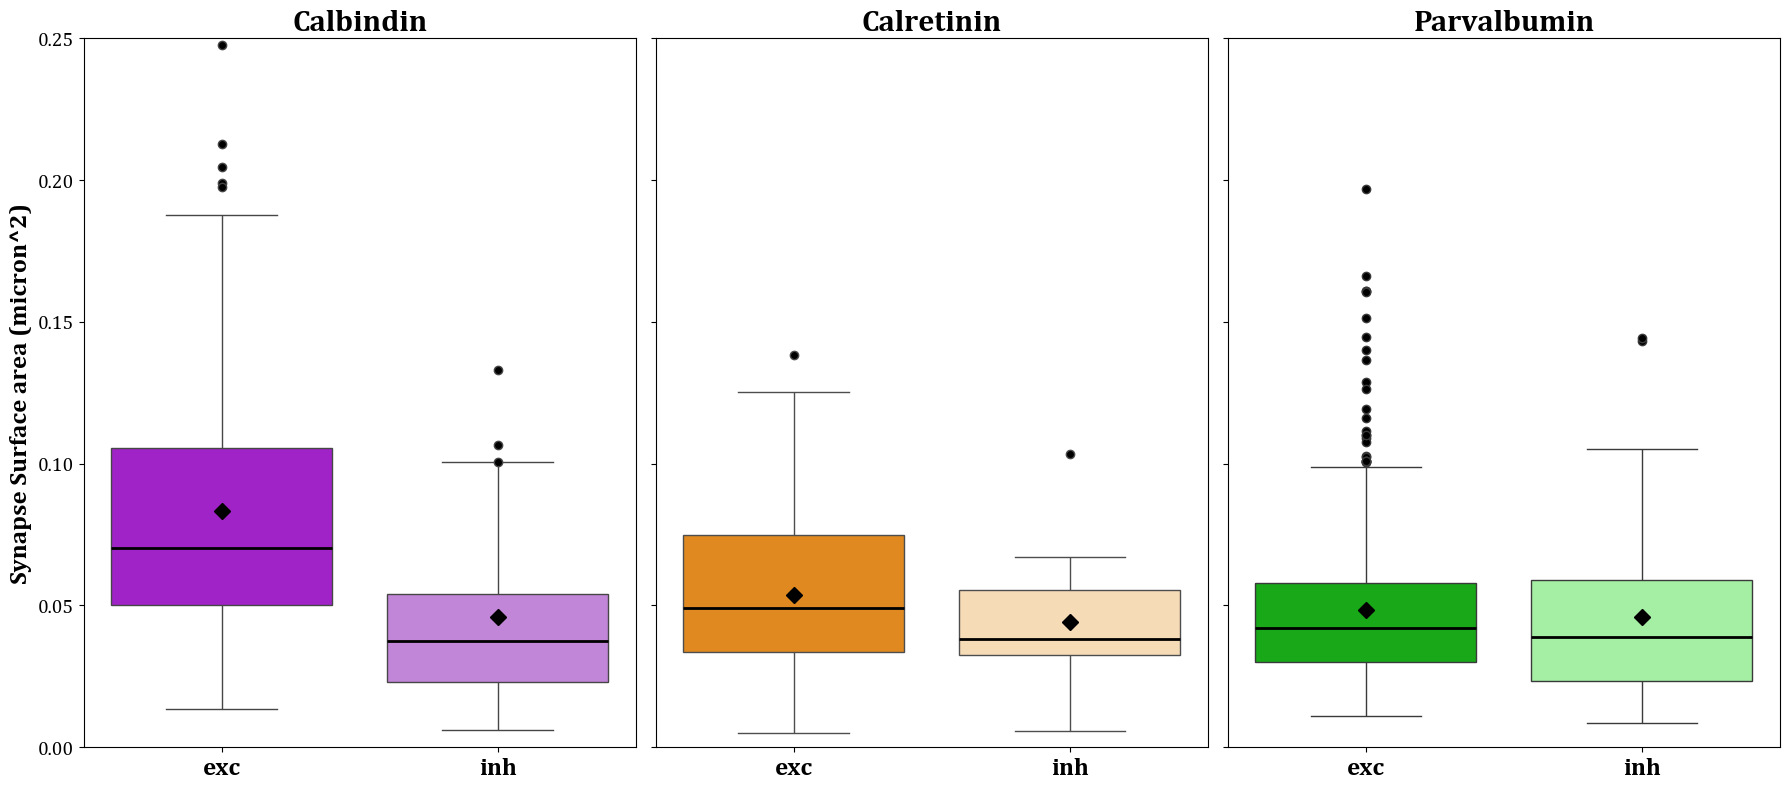

In [113]:
# 1. Add a 'marker' column to each dataframe
calbindin_df['marker'] = 'calbindin'
calretinin_df['marker'] = 'calretinin'
parvalbumin_df['marker'] = 'parvalbumin'

# 2. Combine all dataframes into one
combined_df = pd.concat([calbindin_df, calretinin_df, parvalbumin_df], ignore_index=True)

# 3. Map synapse_number to 'as' and 'ss' groups
combined_df['synapse_type'] = combined_df['synapse_number'].apply(lambda x: 'as' if x.startswith('as') else 'ss')

# 4. Define properties for the boxplot
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=8)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)

# Define color palette for each marker type
palette_dict = {
    'calbindin': ['#AD07E3', '#C878E6'],
    'calretinin': ['darkorange', 'navajowhite'],
    'parvalbumin': ['#00C000', 'palegreen']
}

# 5. Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# 6. Plot each marker's data in a separate subplot
for ax, marker in zip(axes, ['calbindin', 'calretinin', 'parvalbumin']):
    # Filter the dataframe for the current marker
    marker_df = combined_df[combined_df['marker'] == marker]
    
    # Create the boxplot for the current marker
    sns.boxplot(
        x='synapse_type', 
        y='synapse_surface_area', 
        data=marker_df, 
        palette=palette_dict[marker],
        ax=ax, 
        flierprops=flierprops,
        showmeans=True,
        meanprops=meanprops,
        medianprops=medianprops,
        order=['as', 'ss']
    )
    
    # Set title and labels for the subplot with custom font and fontsize
    ax.set_title(f'{marker.capitalize()}', fontsize=22, fontweight='bold', family='Cambria')
    ax.set_xlabel('')
    ax.set_ylabel('Synapse Surface area (micron^2)', fontsize=18, font='Cambria', fontweight='bold')
    
    # Customize x-axis tick labels
    ax.set_xticklabels(['exc', 'inh'], font='Cambria', fontsize=18, fontweight='bold')
    
    # Set y-axis range and tick labels
    ax.set_ylim(0.00, 0.25)  
    ax.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25])  
    ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], font='Cambria', fontsize=14)

# Adjust layout
plt.tight_layout()

plt.savefig('synapse_surface_summary_boxplot.jpg', dpi=300, transparent=True, bbox_inches='tight')
# Show the plot
plt.show()

In [78]:
# 1. Calculate the new 'surface_area/volume' column for each dataframe
calbindin_df['surface_area/volume'] = calbindin_df['bouton_surface_area'] / calbindin_df['bouton_volume']
calretinin_df['surface_area/volume'] = calretinin_df['bouton_surface_area'] / calretinin_df['bouton_volume']
parvalbumin_df['surface_area/volume'] = parvalbumin_df['bouton_surface_area'] / parvalbumin_df['bouton_volume']

# Optionally, handle division by zero or any errors (e.g., if bouton_volume is zero)
# Using np.where to handle cases with zero volume
calbindin_df['surface_area/volume'] = calbindin_df.apply(
    lambda row: row['bouton_surface_area'] / row['bouton_volume'] if row['bouton_volume'] != 0 else float('nan'), axis=1
)
calretinin_df['surface_area/volume'] = calretinin_df.apply(
    lambda row: row['bouton_surface_area'] / row['bouton_volume'] if row['bouton_volume'] != 0 else float('nan'), axis=1
)
parvalbumin_df['surface_area/volume'] = parvalbumin_df.apply(
    lambda row: row['bouton_surface_area'] / row['bouton_volume'] if row['bouton_volume'] != 0 else float('nan'), axis=1
)

In [79]:
calbindin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type,surface_area/volume
0,calbindin,b1,as1,2.420002,0.286752,0.049045,5.050980,as,8.439342
1,calbindin,b2,as2,1.510073,0.120455,0.101529,5.503922,as,12.536390
2,calbindin,b3,as3,1.827364,0.257001,0.045333,7.127451,as,7.110353
4,calbindin,b5,as4,2.487303,0.203978,0.199113,10.153922,as,12.193981
6,calbindin,b7,as6,2.522674,0.152951,0.140426,14.685294,as,16.493330


In [80]:
calretinin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type,surface_area/volume
159,calretinin,b1,ss1,1.792631,0.156600,0.034853,19.996154,ss,11.447179
160,calretinin,b2,ss2,3.131823,0.346040,0.056729,20.849038,ss,9.050464
161,calretinin,b3,as1,0.609929,0.036171,0.010335,23.882692,as,16.862601
162,calretinin,b4,ss3,1.244231,0.126382,0.029389,25.094231,ss,9.845039
163,calretinin,b5,as2,0.756150,0.063169,0.033509,25.705769,as,11.970329


In [81]:
parvalbumin_df.head()

,marker,bouton_number,synapse_number,bouton_surface_area,bouton_volume,synapse_surface_area,synapse_distance_from_soma,synapse_type,surface_area/volume
281,parvalbumin,b2,as2,0.806441,0.038515,0.059982,3.3493,as,20.938579
282,parvalbumin,b3,as3,3.650360,0.260579,0.166120,4.0323,as,14.008650
283,parvalbumin,b4,ss1,1.158350,0.074952,0.055239,4.7494,ss,15.454516
285,parvalbumin,b6,ss3,2.633370,0.171998,0.068455,6.6741,ss,15.310469
286,parvalbumin,b7,as4,1.042910,0.045959,0.021003,7.1191,as,22.692083


C:\Users\PC\AppData\Local\Temp\ipykernel_1248\269526714.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\269526714.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['exc', 'inh'], font='Cambria', fontsize=18, fontweight='bold')
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\269526714.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], font='Cambria', fontsize=14)
C:\Users\PC\AppData\Local\Temp\ipykernel_1248\269526714.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

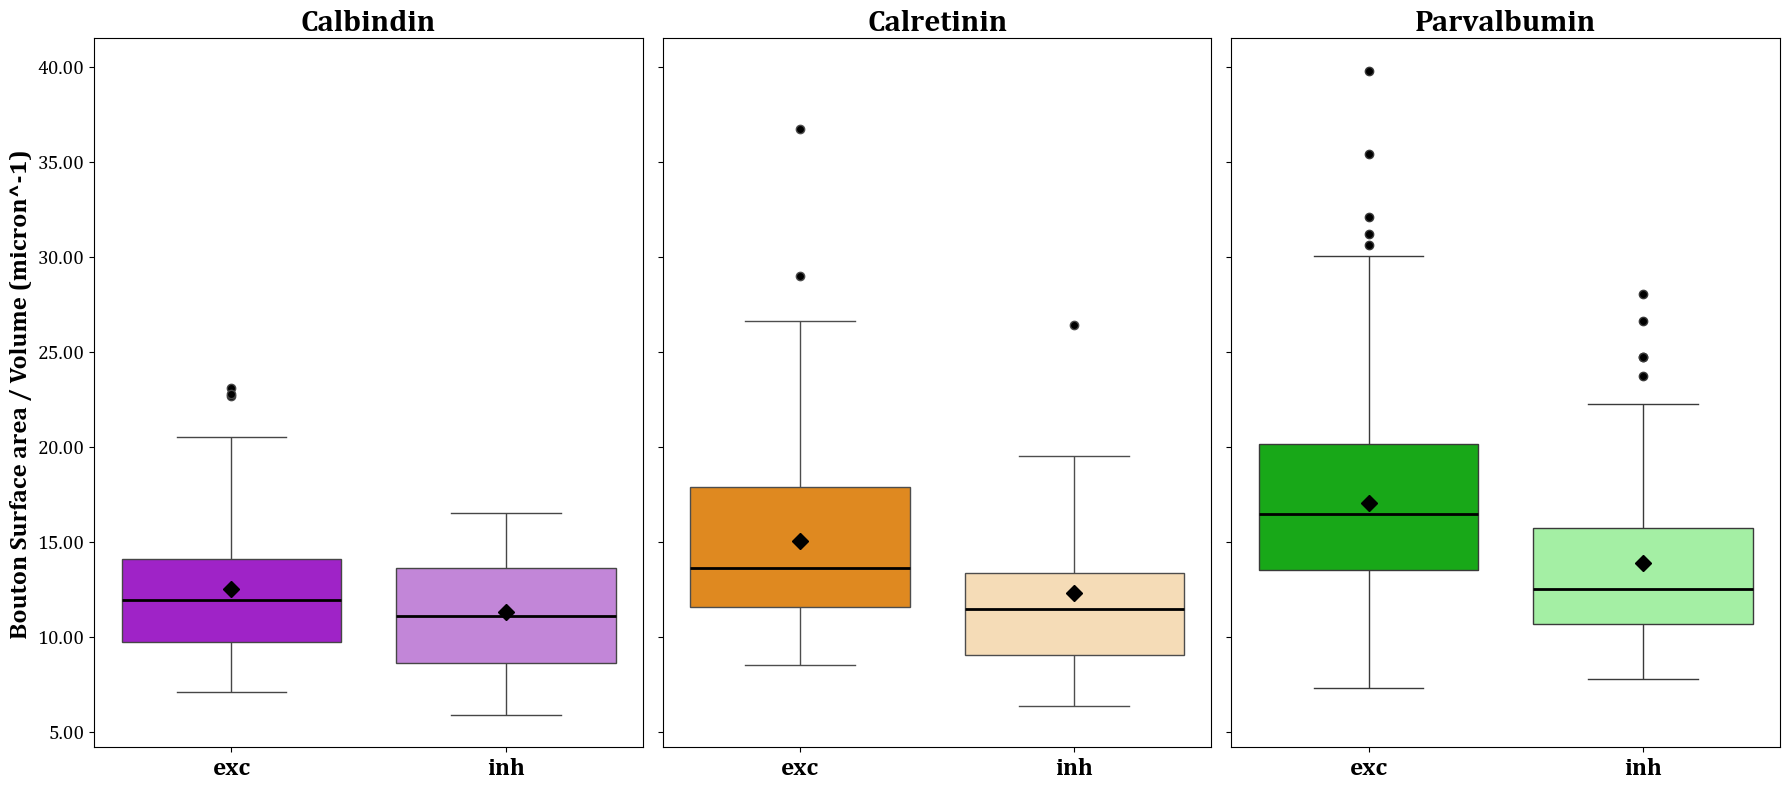

In [114]:
# 1. Add a 'marker' column to each dataframe
calbindin_df['marker'] = 'calbindin'
calretinin_df['marker'] = 'calretinin'
parvalbumin_df['marker'] = 'parvalbumin'

# 2. Combine all dataframes into one
combined_df = pd.concat([calbindin_df, calretinin_df, parvalbumin_df], ignore_index=True)

# 3. Map synapse_number to 'as' and 'ss' groups
combined_df['synapse_type'] = combined_df['synapse_number'].apply(lambda x: 'as' if x.startswith('as') else 'ss')

# 4. Define properties for the boxplot
meanprops = dict(markerfacecolor='black', marker='D', markeredgecolor='black', markersize=8)
flierprops = dict(markerfacecolor='black', marker='o')
medianprops = dict(color='black', linewidth=2)

# Define color palette for each marker type
palette_dict = {
    'calbindin': ['#AD07E3', '#C878E6'],
    'calretinin': ['darkorange', 'navajowhite'],
    'parvalbumin': ['#00C000', 'palegreen']
}

# 5. Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# 6. Plot each marker's data in a separate subplot
for ax, marker in zip(axes, ['calbindin', 'calretinin', 'parvalbumin']):
    # Filter the dataframe for the current marker
    marker_df = combined_df[combined_df['marker'] == marker]
    
    # Create the boxplot for the current marker
    sns.boxplot(
        x='synapse_type', 
        y='surface_area/volume',  
        data=marker_df, 
        palette=palette_dict[marker],
        ax=ax, 
        flierprops=flierprops,
        showmeans=True,
        meanprops=meanprops,
        medianprops=medianprops,
        order=['as', 'ss']
    )
    
    # Set title and labels for the subplot with custom font and fontsize
    ax.set_title(f'{marker.capitalize()}', fontsize=22, fontweight='bold', family='Cambria')
    ax.set_xlabel('')
    ax.set_ylabel('Bouton Surface area / Volume (micron^-1)', fontsize=18, font='Cambria', fontweight='bold')
    
    # Customize tick labels
    ax.set_xticklabels(['exc', 'inh'], font='Cambria', fontsize=18, fontweight='bold')
    ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], font='Cambria', fontsize=14)

plt.tight_layout()

plt.savefig('bouton_ratio_summary_boxplot.jpg', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

### Statistical analysis

In [131]:
# Statistics: Synapse Surface area

markers = ['calbindin', 'calretinin', 'parvalbumin']

# Mann-Whitney U Test: Compare as vs. ss within each marker
print("### Mann-Whitney U Test Results (Within Markers) ###\n")

for marker in markers:
    print(f'\nAnalyzing marker: {marker}')
    
    # Subset the data for the current marker
    marker_df = combined_df[combined_df['marker'] == marker]
    
    # Separate data for 'as' and 'ss'
    as_group = marker_df[marker_df['synapse_type'] == 'as']['synapse_surface_area']
    ss_group = marker_df[marker_df['synapse_type'] == 'ss']['synapse_surface_area']
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(as_group, ss_group, alternative='two-sided')
    
    print(f'Mann-Whitney U Test Results for {marker}: U-statistic = {u_stat:.4f}, p-value = {p_value:.4e}')
    
    if p_value < 0.05:
        print(f'Significant difference found between as and ss for {marker} (p < 0.05)')
    else:
        print(f'No significant difference found between as and ss for {marker} (p >= 0.05)')

# Prepare data for Newman-Keuls test
print("\n### Newman-Keuls Test Results (Between Markers) ###\n")

# Combine all data into a single dataframe
combined_df['group'] = combined_df['marker'] + "_" + combined_df['synapse_type']

# Perform ANOVA to check for significant differences between groups
model = ols('synapse_surface_area ~ group', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table:')
print(anova_table)

# If ANOVA is significant, perform Newman-Keuls test
if anova_table['PR(>F)'][0] < 0.05:
    print('Significant differences found, performing Newman-Keuls test...')
    
    # Perform Newman-Keuls Test using Tukey HSD approximation
    mc = MultiComparison(combined_df['synapse_surface_area'], combined_df['group'])
    newman_keuls_result = mc.tukeyhsd()  # Tukey's HSD can be used to approximate Newman-Keuls
    print(newman_keuls_result.summary())
else:
    print('No significant differences found in ANOVA. Skipping Newman-Keuls test.')

### Mann-Whitney U Test Results (Within Markers) ###


Analyzing marker: calbindin
Mann-Whitney U Test Results for calbindin: U-statistic = 2966.0000, p-value = 7.5350e-06
Significant difference found between as and ss for calbindin (p < 0.05)

Analyzing marker: calretinin
Mann-Whitney U Test Results for calretinin: U-statistic = 1026.0000, p-value = 2.2872e-01
No significant difference found between as and ss for calretinin (p >= 0.05)

Analyzing marker: parvalbumin
Mann-Whitney U Test Results for parvalbumin: U-statistic = 16858.0000, p-value = 2.7421e-01
No significant difference found between as and ss for parvalbumin (p >= 0.05)

### Newman-Keuls Test Results (Between Markers) ###

ANOVA Table:
            sum_sq     df          F        PR(>F)
group     0.124609    5.0  24.655838  4.629918e-23
Residual  0.769207  761.0        NaN           NaN
Significant differences found, performing Newman-Keuls test...


C:\Users\PC\AppData\Local\Temp\ipykernel_3788\2023851197.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
  calbindin_as   calbindin_ss  -0.0374    0.0 -0.0553 -0.0195   True
  calbindin_as  calretinin_as  -0.0295    0.0 -0.0417 -0.0172   True
  calbindin_as  calretinin_ss  -0.0393    0.0 -0.0628 -0.0157   True
  calbindin_as parvalbumin_as   -0.035    0.0 -0.0444 -0.0256   True
  calbindin_as parvalbumin_ss  -0.0375    0.0 -0.0509  -0.024   True
  calbindin_ss  calretinin_as    0.008 0.8121 -0.0102  0.0261  False
  calbindin_ss  calretinin_ss  -0.0018    1.0  -0.029  0.0253  False
  calbindin_ss parvalbumin_as   0.0024 0.9983  -0.014  0.0188  False
  calbindin_ss parvalbumin_ss     -0.0    1.0  -0.019   0.019  False
 calretinin_as  calretinin_ss  -0.0098 0.8484 -0.0336   0.014  False
 calretinin_as parvalbumin_as  -0.0055 0.6145 -0.0156  0.0045  False
 calretinin_as parvalbumin_ss   -0

In [83]:
# Rename column to avoid special characters
combined_df.rename(columns={'surface_area/volume': 'surface_area_volume_ratio'}, inplace=True)

# Statistics: Bouton Surface area / Volume ratio
markers = ['calbindin', 'calretinin', 'parvalbumin']

# Mann-Whitney U Test: Compare as vs. ss within each marker
print("### Mann-Whitney U Test Results (Within Markers) ###\n")

for marker in markers:
    print(f'\nAnalyzing marker: {marker}')
    
    # Subset the data for the current marker
    marker_df = combined_df[combined_df['marker'] == marker]
    
    # Separate data for 'as' and 'ss'
    as_group = marker_df[marker_df['synapse_type'] == 'as']['surface_area_volume_ratio']
    ss_group = marker_df[marker_df['synapse_type'] == 'ss']['surface_area_volume_ratio']
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(as_group, ss_group, alternative='two-sided')
    
    print(f'Mann-Whitney U Test Results for {marker}: U-statistic = {u_stat:.4f}, p-value = {p_value:.4e}')
    
    if p_value < 0.05:
        print(f'Significant difference found between as and ss for {marker} (p < 0.05)')
    else:
        print(f'No significant difference found between as and ss for {marker} (p >= 0.05)')

# Prepare data for Newman-Keuls test
print("\n### Newman-Keuls Test Results (Between Markers) ###\n")

# Combine all data into a single dataframe
combined_df['group'] = combined_df['marker'] + "_" + combined_df['synapse_type']

# Perform ANOVA to check for significant differences between groups
model = ols('surface_area_volume_ratio ~ group', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table:')
print(anova_table)

# If ANOVA is significant, perform Newman-Keuls test
if anova_table['PR(>F)'][0] < 0.05:
    print('Significant differences found, performing Newman-Keuls test...')
    
    # Perform Newman-Keuls Test using Tukey HSD approximation
    mc = MultiComparison(combined_df['surface_area_volume_ratio'], combined_df['group'])
    newman_keuls_result = mc.tukeyhsd()  # Tukey's HSD can be used to approximate Newman-Keuls
    print(newman_keuls_result.summary())
else:
    print('No significant differences found in ANOVA. Skipping Newman-Keuls test.')

### Mann-Whitney U Test Results (Within Markers) ###


Analyzing marker: calbindin
Mann-Whitney U Test Results for calbindin: U-statistic = 2267.0000, p-value = 1.7569e-01
No significant difference found between as and ss for calbindin (p >= 0.05)

Analyzing marker: calretinin
Mann-Whitney U Test Results for calretinin: U-statistic = 1198.0000, p-value = 1.2078e-02
Significant difference found between as and ss for calretinin (p < 0.05)

Analyzing marker: parvalbumin
Mann-Whitney U Test Results for parvalbumin: U-statistic = 21917.0000, p-value = 2.9933e-08
Significant difference found between as and ss for parvalbumin (p < 0.05)

### Newman-Keuls Test Results (Between Markers) ###

ANOVA Table:
                sum_sq     df          F        PR(>F)
group      3019.233822    5.0  28.083728  3.667043e-26
Residual  16362.763179  761.0        NaN           NaN
Significant differences found, performing Newman-Keuls test...


C:\Users\PC\AppData\Local\Temp\ipykernel_1248\2207158744.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
  calbindin_as   calbindin_ss  -1.1893 0.7831 -3.7957  1.4171  False
  calbindin_as  calretinin_as   2.5141 0.0009  0.7265  4.3017   True
  calbindin_as  calretinin_ss  -0.2335    1.0 -3.6684  3.2015  False
  calbindin_as parvalbumin_as   4.5251    0.0  3.1501  5.9002   True
  calbindin_as parvalbumin_ss   1.3843 0.3337 -0.5769  3.3456  False
  calbindin_ss  calretinin_as   3.7034  0.001  1.0503  6.3565   True
  calbindin_ss  calretinin_ss   0.9559  0.983 -2.9992  4.9109  False
  calbindin_ss parvalbumin_as   5.7144    0.0  3.3198  8.1091   True
  calbindin_ss parvalbumin_ss   2.5737 0.0865 -0.1994  5.3467  False
 calretinin_as  calretinin_ss  -2.7475 0.2112 -6.2181   0.723  False
 calretinin_as parvalbumin_as    2.011 0.0013  0.5493  3.4727   True
 calretinin_as parvalbumin_ss  -1.

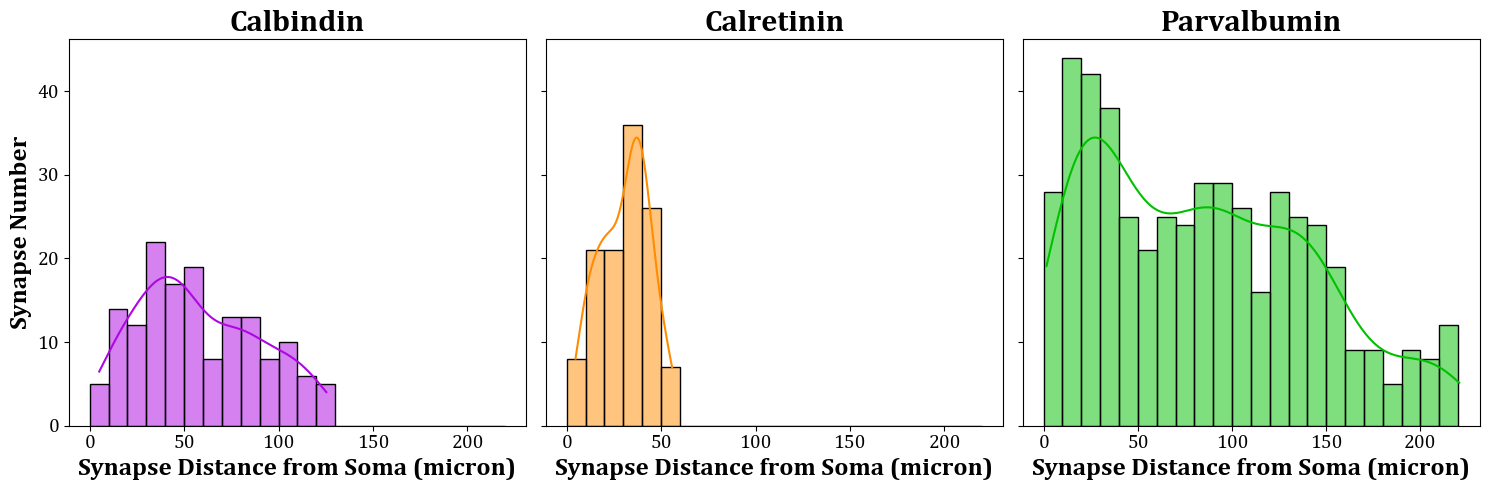

In [122]:
# Define the bin edges for consistent binning across all histograms
bins = list(range(0, 230, 10))

# Set the global font properties for tick labels
plt.rc('font', family='Cambria')  

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotting histograms with KDE for each marker
sns.histplot(calbindin_df['synapse_distance_from_soma'], bins=bins, color='#AD07E3', kde=True, ax=axes[0])
axes[0].set_title('Calbindin', fontsize=22, fontweight='bold', family='Cambria')
axes[0].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[0].set_ylabel('Synapse Number', fontsize=18, fontweight='bold', family='Cambria')
axes[0].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(calretinin_df['synapse_distance_from_soma'], bins=bins, color='darkorange', kde=True, ax=axes[1])
axes[1].set_title('Calretinin', fontsize=22, fontweight='bold', family='Cambria')
axes[1].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[1].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(parvalbumin_df['synapse_distance_from_soma'], bins=bins, color='#00C000', kde=True, ax=axes[2])
axes[2].set_title('Parvalbumin', fontsize=22, fontweight='bold', family='Cambria')
axes[2].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[2].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

# Adjust layout for better visibility
plt.tight_layout()
plt.savefig('synapse_full_histoplot.jpg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

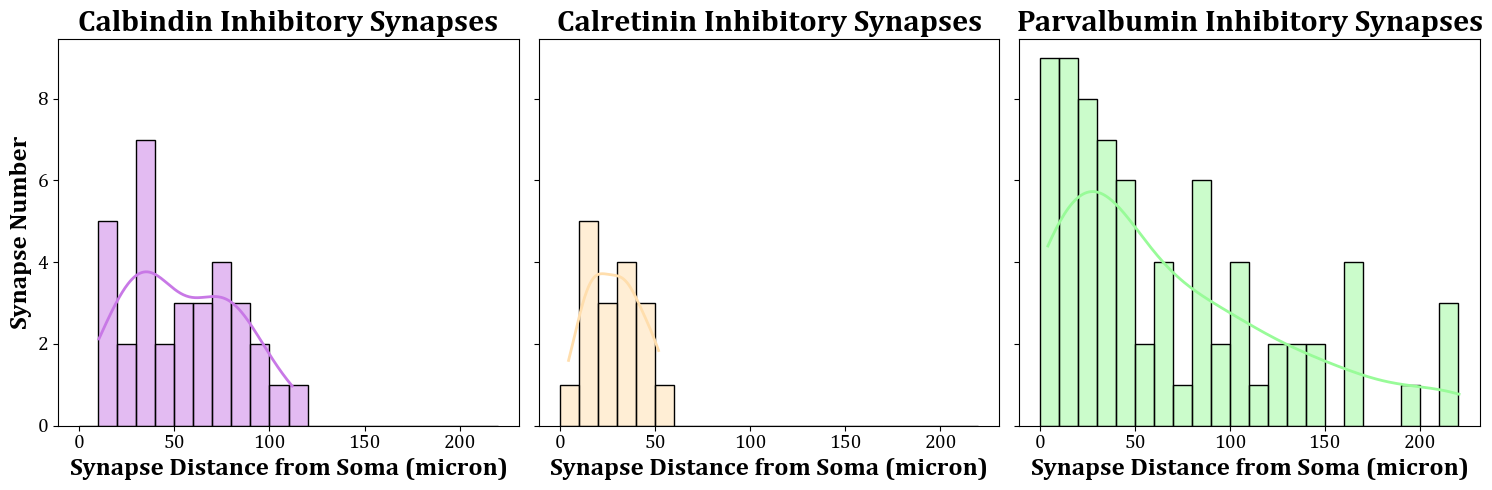

In [121]:
# Define the bin edges for consistent binning across all histograms
bins = list(range(0, 230, 10))

# Set the global font properties for tick labels
plt.rc('font', family='Cambria')  

# Filter dataframes to include only rows where synapse_type is 'ss'
calbindin_ss = calbindin_df[calbindin_df['synapse_type'] == 'ss']
calretinin_ss = calretinin_df[calretinin_df['synapse_type'] == 'ss']
parvalbumin_ss = parvalbumin_df[parvalbumin_df['synapse_type'] == 'ss']

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotting histograms with KDE for each marker filtered by 'ss' synapse type
sns.histplot(
    calbindin_ss['synapse_distance_from_soma'], 
    bins=bins, color='#C878E6', kde=True, 
    line_kws={'color': '#AD07E3', 'linewidth': 2},  
    ax=axes[0]
)
axes[0].set_title('Calbindin Inhibitory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[0].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[0].set_ylabel('Synapse Number', fontsize=18, fontweight='bold', family='Cambria')
axes[0].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(
    calretinin_ss['synapse_distance_from_soma'], 
    bins=bins, color='navajowhite', kde=True, 
    line_kws={'color': 'darkorange', 'linewidth': 2},  
    ax=axes[1]
)
axes[1].set_title('Calretinin Inhibitory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[1].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[1].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(
    parvalbumin_ss['synapse_distance_from_soma'], 
    bins=bins, color='palegreen', kde=True, 
    line_kws={'color': '#00C000', 'linewidth': 2}, 
    ax=axes[2]
)
axes[2].set_title('Parvalbumin Inhibitory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[2].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[2].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

# Adjust layout for better visibility
plt.tight_layout()
plt.savefig('synapse_ss_histoplot.jpg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

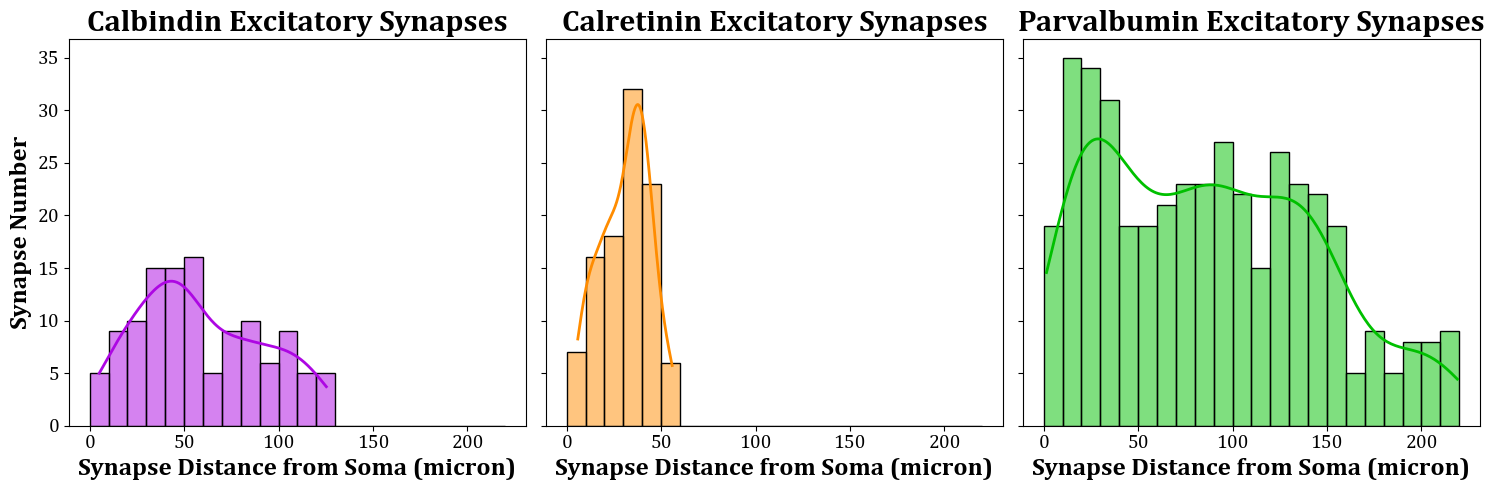

In [120]:
# Define the bin edges for consistent binning across all histograms
bins = list(range(0, 230, 10))

# Set the global font properties for tick labels
plt.rc('font', family='Cambria')  

# Filter dataframes to include only rows where synapse_type is 'ss'
calbindin_ss = calbindin_df[calbindin_df['synapse_type'] == 'as']
calretinin_ss = calretinin_df[calretinin_df['synapse_type'] == 'as']
parvalbumin_ss = parvalbumin_df[parvalbumin_df['synapse_type'] == 'as']

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotting histograms with KDE for each marker filtered by 'ss' synapse type
sns.histplot(
    calbindin_ss['synapse_distance_from_soma'], 
    bins=bins, color='#AD07E3', kde=True, 
    line_kws={'color': '#AD07E3', 'linewidth': 2},  
    ax=axes[0]
)
axes[0].set_title('Calbindin Excitatory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[0].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[0].set_ylabel('Synapse Number', fontsize=18, fontweight='bold', family='Cambria')
axes[0].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(
    calretinin_ss['synapse_distance_from_soma'], 
    bins=bins, color='darkorange', kde=True, 
    line_kws={'color': 'darkorange', 'linewidth': 2},  
    ax=axes[1]
)
axes[1].set_title('Calretinin Excitatory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[1].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[1].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

sns.histplot(
    parvalbumin_ss['synapse_distance_from_soma'], 
    bins=bins, color='#00C000', kde=True, 
    line_kws={'color': '#00C000', 'linewidth': 2},  
    ax=axes[2]
)
axes[2].set_title('Parvalbumin Excitatory Synapses', fontsize=22, fontweight='bold', family='Cambria')
axes[2].set_xlabel('Synapse Distance from Soma (micron)', fontsize=18, fontweight='bold', family='Cambria')
axes[2].tick_params(axis='both', which='major', labelsize=14, labelcolor='black')

# Adjust layout for better visibility
plt.tight_layout()
plt.savefig('synapse_as_histoplot.jpg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [118]:
# Statistics: Synapse Distance from Soma 

markers = ['calbindin', 'calretinin', 'parvalbumin']

# Mann-Whitney U Test: Compare as vs. ss within each marker
print("### Mann-Whitney U Test Results (Within Markers) ###\n")

for marker in markers:
    print(f'\nAnalyzing marker: {marker}')
    
    # Subset the data for the current marker
    marker_df = combined_df[combined_df['marker'] == marker]
    
    # Separate data for 'as' and 'ss'
    as_group = marker_df[marker_df['synapse_type'] == 'as']['synapse_distance_from_soma']
    ss_group = marker_df[marker_df['synapse_type'] == 'ss']['synapse_distance_from_soma']
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(as_group, ss_group, alternative='two-sided')
    
    print(f'Mann-Whitney U Test Results for {marker}: U-statistic = {u_stat:.4f}, p-value = {p_value:.4e}')
    
    if p_value < 0.05:
        print(f'Significant difference found between as and ss for {marker} (p < 0.05)')
    else:
        print(f'No significant difference found between as and ss for {marker} (p >= 0.05)')

# Prepare data for Newman-Keuls test
print("\n### Newman-Keuls Test Results (Between Markers) ###\n")

# Combine all data into a single dataframe
combined_df['group'] = combined_df['marker'] + "_" + combined_df['synapse_type']

# Perform ANOVA to check for significant differences between groups
model = ols('synapse_distance_from_soma ~ group', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table:')
print(anova_table)

# If ANOVA is significant, perform Newman-Keuls test
if anova_table['PR(>F)'][0] < 0.05:
    print('Significant differences found, performing Newman-Keuls test...')
    
    # Perform Newman-Keuls Test using Tukey HSD approximation
    mc = MultiComparison(combined_df['synapse_distance_from_soma'], combined_df['group'])
    newman_keuls_result = mc.tukeyhsd()  # Tukey's HSD can be used to approximate Newman-Keuls
    print(newman_keuls_result.summary())
else:
    print('No significant differences found in ANOVA. Skipping Newman-Keuls test.')

### Mann-Whitney U Test Results (Within Markers) ###


Analyzing marker: calbindin
Mann-Whitney U Test Results for calbindin: U-statistic = 2126.0000, p-value = 4.6907e-01
No significant difference found between as and ss for calbindin (p >= 0.05)

Analyzing marker: calretinin
Mann-Whitney U Test Results for calretinin: U-statistic = 967.0000, p-value = 4.4988e-01
No significant difference found between as and ss for calretinin (p >= 0.05)

Analyzing marker: parvalbumin
Mann-Whitney U Test Results for parvalbumin: U-statistic = 18988.0000, p-value = 3.0137e-03
Significant difference found between as and ss for parvalbumin (p < 0.05)

### Newman-Keuls Test Results (Between Markers) ###

ANOVA Table:
                sum_sq     df          F        PR(>F)
group     3.385853e+05    5.0  28.542369  1.423007e-26
Residual  1.805480e+06  761.0        NaN           NaN
Significant differences found, performing Newman-Keuls test...


C:\Users\PC\AppData\Local\Temp\ipykernel_1248\2270591365.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
  calbindin_as   calbindin_ss  -5.2464 0.9941 -32.6246 22.1318  False
  calbindin_as  calretinin_as -28.0339 0.0003 -46.8113 -9.2565   True
  calbindin_as  calretinin_ss -30.4082 0.1547 -66.4897  5.6733  False
  calbindin_as parvalbumin_as  28.6734    0.0  14.2296 43.1173   True
  calbindin_as parvalbumin_ss  10.0663 0.7295 -10.5353  30.668  False
  calbindin_ss  calretinin_as -22.7875 0.1809 -50.6566  5.0816  False
  calbindin_ss  calretinin_ss -25.1618  0.512 -66.7066 16.3831  False
  calbindin_ss parvalbumin_as  33.9199 0.0018   8.7659 59.0738   True
  calbindin_ss parvalbumin_ss  15.3128 0.6632 -13.8167 44.4422  False
 calretinin_as  calretinin_ss  -2.3743    1.0 -38.8297 34.0812  False
 calretinin_as parvalbumin_as  56.7073    0.0  41.3533 72.0614   True
 calretinin_as parva